# Data Analysis (Classification): Naive Bayes
Naive Bayes performs classification based on Bayes' theorem assuming conditional independence between every pair of features given the value of the class variable.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Naive Bayes

In [5]:
# Create and Train Model
model_nb = GaussianNB().fit(X_train,y_train.values.ravel())

# Model Prediction
y_prediction = model_nb.predict(X_test)

# Model Results
model_results = [['Score', model_nb.score(X_train, y_train.values.ravel())],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_nb = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_nb

,Evaluation Metric,Value
0,Score,0.850989
1,Accuracy,0.848849


## Cross-Validation

In [6]:
# Model Scores
model_scores = cross_val_score(model_nb, X, y.values.ravel(), cv=5)

print("Accuracy: %0.2f (+/- % 0.2f)" % (model_scores.mean(), model_scores.std() * 2))
print("CV Scores: ", model_scores)

Accuracy: 0.85 (+/-  0.07)
CV Scores:  [0.84684685 0.87487487 0.89579158 0.8256513  0.80160321]


## Evaluating Model

In [7]:
# Confusion Matrix
model_confusion_matrix_svc = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_svc

array([[626,  80],
       [ 71, 222]])

Text(0.5, 257.44, 'Predicted label')

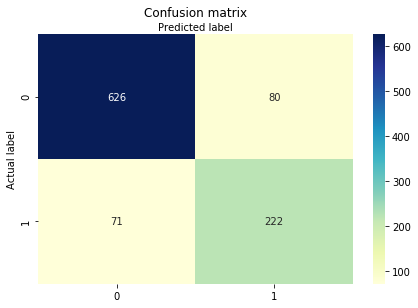

In [8]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_svc))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')